## Getting Started

### Prerequisite Modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.graphics.tsaplots as sgt
import plotly.graph_objects as go
import plotly.graph_objs as go
import plotly.express as px

from statsmodels.graphics import tsaplots
from plotly.subplots import make_subplots


/tmp/ipykernel_35316/3662617572.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv("/home/kkyu/amr_ws/DL/IoT_Project/environment.csv")
df.head()

,Date,Temperature (°C),Humidity (%),CO2 (PPM),PM-10 (μg/m3)
0,2024-03-10 13:01:38,26.2,23.0,294,11.36
1,2024-03-10 13:01:40,26.2,23.0,293,20.16
2,2024-03-10 13:01:42,26.2,23.0,290,23.09
3,2024-03-10 13:01:44,26.2,23.0,288,22.11
4,2024-03-10 13:01:48,26.2,23.0,285,26.02


In [3]:
df.describe()

,Temperature (°C),Humidity (%),CO2 (PPM),PM-10 (μg/m3)
count,1732.000000,1732.000000,1732.000000,1732.000000
mean,25.398557,22.034642,156.653002,35.535110
std,2.078818,3.124226,34.562116,78.881834
min,22.600000,17.000000,120.000000,0.610000
25%,23.400000,19.000000,128.000000,18.200000
50%,26.200000,23.000000,148.000000,24.070000
75%,27.600000,23.000000,168.000000,30.910000
max,28.000000,30.000000,294.000000,678.030000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1732 entries, 0 to 1731
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              1732 non-null   object 
 1   Temperature (°C)  1732 non-null   float64
 2   Humidity (%)      1732 non-null   float64
 3   CO2 (PPM)         1732 non-null   int64  
 4   PM-10 (μg/m3)     1732 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 67.8+ KB


In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)


### EDA Visualizaion

array([[<Axes: title={'center': 'Temperature (°C)'}>,
        <Axes: title={'center': 'Humidity (%)'}>],
       [<Axes: title={'center': 'CO2 (PPM)'}>,
        <Axes: title={'center': 'PM-10 (μg/m3)'}>]], dtype=object)

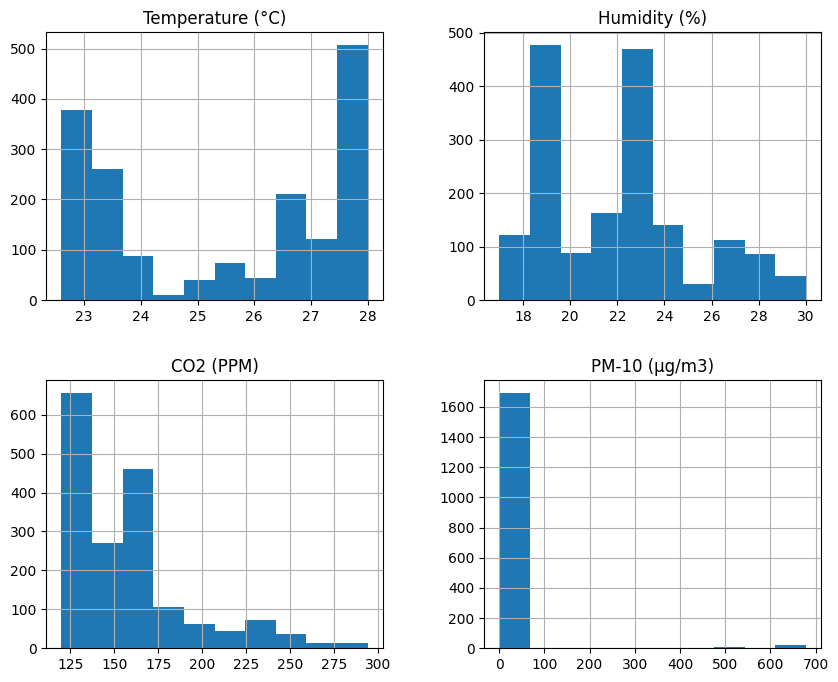

In [6]:
df.hist(figsize = (10,8))

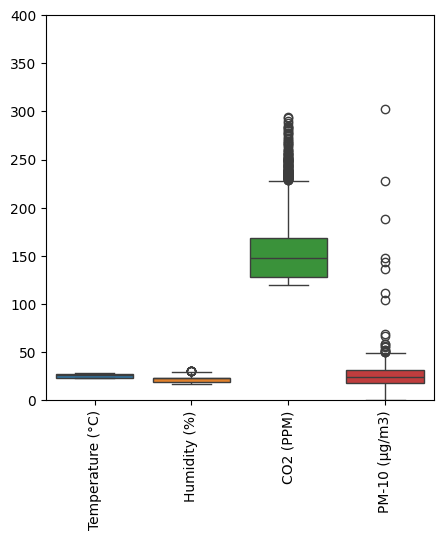

In [7]:
plt.figure(figsize=(5,5))
sns.boxplot(data=df)
plt.ylim(0, 400)  # y 축 범위 조정
plt.xticks(rotation='vertical')
plt.show()


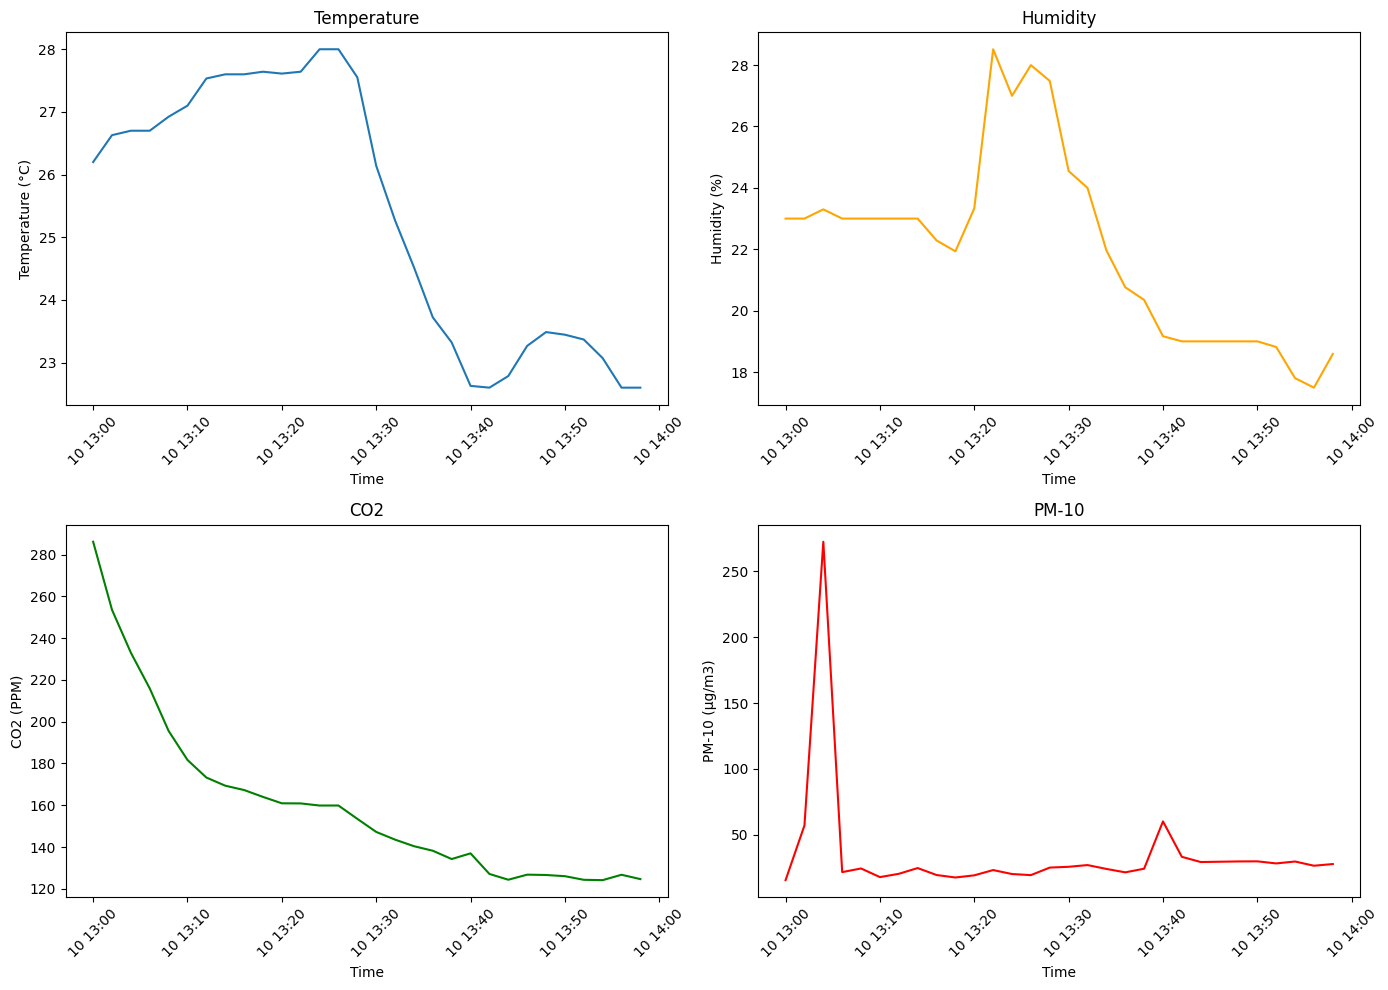

In [8]:
# Time 앞에 10은 10일을 의미함

df_resampled = df.resample('2min').mean()

fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Plot Temperature
axs[0, 0].plot(df_resampled.index, df_resampled['Temperature (°C)'], label='Temperature (°C)')
axs[0, 0].set_title('Temperature')
axs[0, 0].set_xlabel('Time')
axs[0, 0].set_ylabel('Temperature (°C)')

# Plot Humidity
axs[0, 1].plot(df_resampled.index, df_resampled['Humidity (%)'], label='Humidity (%)', color='orange')
axs[0, 1].set_title('Humidity')
axs[0, 1].set_xlabel('Time')
axs[0, 1].set_ylabel('Humidity (%)')

# Plot CO2
axs[1, 0].plot(df_resampled.index, df_resampled['CO2 (PPM)'], label='CO2 (PPM)', color='green')
axs[1, 0].set_title('CO2')
axs[1, 0].set_xlabel('Time')
axs[1, 0].set_ylabel('CO2 (PPM)')

# Plot PM-10
axs[1, 1].plot(df_resampled.index, df_resampled['PM-10 (μg/m3)'], label='PM-10 (μg/m3)', color='red')
axs[1, 1].set_title('PM-10')
axs[1, 1].set_xlabel('Time')
axs[1, 1].set_ylabel('PM-10 (μg/m3)')

for ax in axs.flat:
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


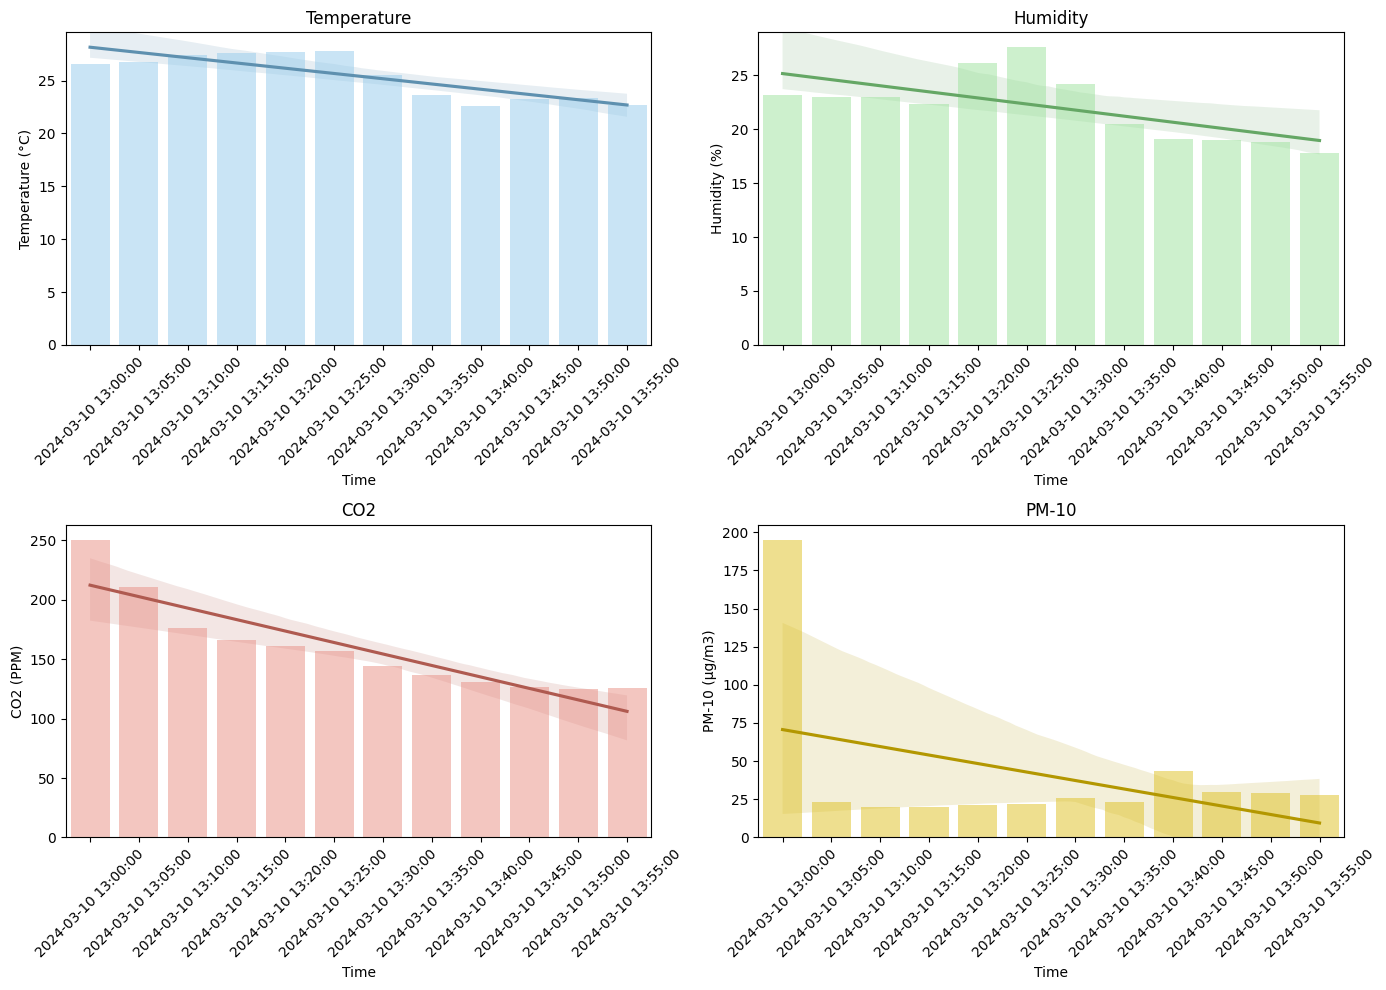

In [9]:
df_resampled = df.resample('5min').mean()

fig, axs = plt.subplots(2, 2, figsize=(14, 10))

def darken_color(color, factor=0.7):
    """Darken the given color by multiplying its RGB values by the given factor."""
    rgb = np.array(color)
    new_rgb = tuple((rgb * factor).clip(0, 1))
    return new_rgb

# Plot Temperature
temp_color = (135/255, 206/255, 250/255)  # 'skyblue'
dark_temp_color = darken_color(temp_color)
sns.regplot(x=np.arange(len(df_resampled.index)), y=df_resampled['Temperature (°C)'], ax=axs[0, 0], scatter=False, line_kws={'color': dark_temp_color})
sns.barplot(x=df_resampled.index, y='Temperature (°C)', data=df_resampled, ax=axs[0, 0], color=temp_color, alpha=0.5)
axs[0, 0].set_title('Temperature')
axs[0, 0].set_xlabel('Time')
axs[0, 0].set_ylabel('Temperature (°C)')

# Plot Humidity
humidity_color = (144/255, 238/255, 144/255)  # 'lightgreen'
dark_humidity_color = darken_color(humidity_color)
sns.regplot(x=np.arange(len(df_resampled.index)), y=df_resampled['Humidity (%)'], ax=axs[0, 1], scatter=False, line_kws={'color': dark_humidity_color})
sns.barplot(x=df_resampled.index, y='Humidity (%)', data=df_resampled, ax=axs[0, 1], color=humidity_color, alpha=0.5)
axs[0, 1].set_title('Humidity')
axs[0, 1].set_xlabel('Time')
axs[0, 1].set_ylabel('Humidity (%)')

# Plot CO2
co2_color = (250/255, 128/255, 114/255)  # 'salmon'
dark_co2_color = darken_color(co2_color)
sns.regplot(x=np.arange(len(df_resampled.index)), y=df_resampled['CO2 (PPM)'], ax=axs[1, 0], scatter=False, line_kws={'color': dark_co2_color})
sns.barplot(x=df_resampled.index, y='CO2 (PPM)', data=df_resampled, ax=axs[1, 0], color=co2_color, alpha=0.5)
axs[1, 0].set_title('CO2')
axs[1, 0].set_xlabel('Time')
axs[1, 0].set_ylabel('CO2 (PPM)')

# Plot PM-10
pm10_color = (255/255, 215/255, 0)  # 'gold'
dark_pm10_color = darken_color(pm10_color)
sns.regplot(x=np.arange(len(df_resampled.index)), y=df_resampled['PM-10 (μg/m3)'], ax=axs[1, 1], scatter=False, line_kws={'color': dark_pm10_color})
sns.barplot(x=df_resampled.index, y='PM-10 (μg/m3)', data=df_resampled, ax=axs[1, 1], color=pm10_color, alpha=0.5)
axs[1, 1].set_title('PM-10')
axs[1, 1].set_xlabel('Time')
axs[1, 1].set_ylabel('PM-10 (μg/m3)')

for ax in axs.flat:
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


<Axes: >

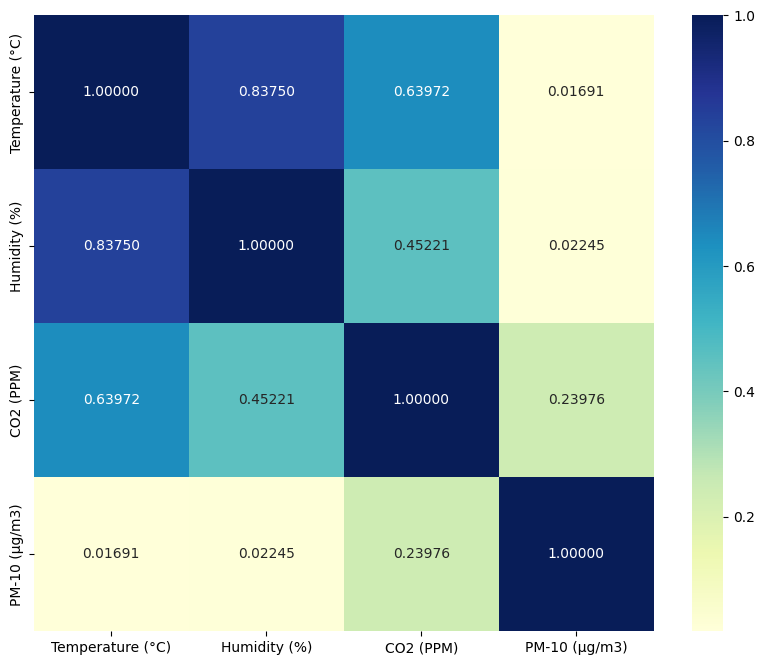

In [10]:
plt.figure(figsize = (10,8))
sns.heatmap(df[['Temperature (°C)', 'Humidity (%)', 'CO2 (PPM)', 'PM-10 (μg/m3)']].corr(),annot=True, fmt="1.5f", cmap = 'YlGnBu')

In [11]:
corr = df_resampled.corr()
corr.style.background_gradient(cmap='coolwarm')


,Temperature (°C),Humidity (%),CO2 (PPM),PM-10 (μg/m3)
Temperature (°C),1.000000,0.882376,0.638835,0.076467
Humidity (%),0.882376,1.000000,0.467404,0.038275
CO2 (PPM),0.638835,0.467404,1.000000,0.692008
PM-10 (μg/m3),0.076467,0.038275,0.692008,1.000000


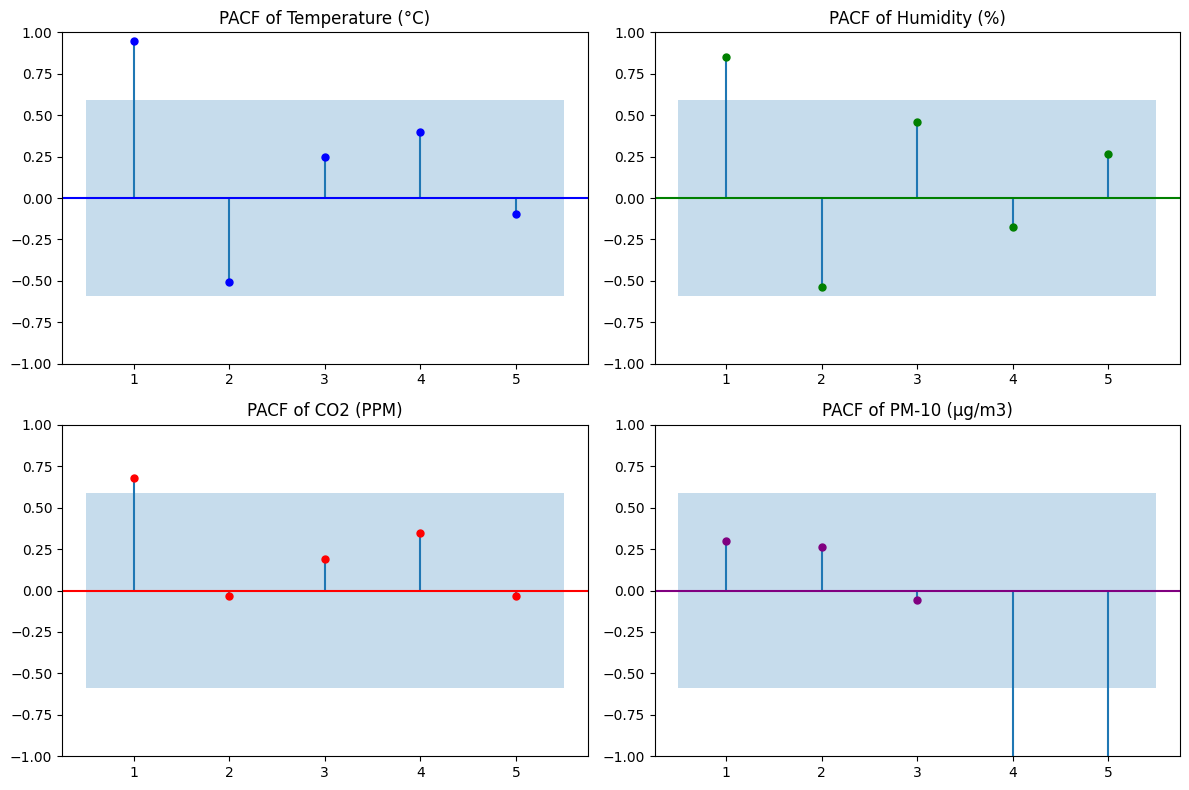

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot PACF for Temperature (°C) with a specific color
sgt.plot_pacf(df_resampled['Temperature (°C)'][1:], lags=5, alpha=0.05, zero=False, method='ols', ax=axes[0, 0], color='blue')
axes[0, 0].set_title("PACF of Temperature (°C)", size=12)

# Plot PACF for Humidity (%) with a specific color
sgt.plot_pacf(df_resampled['Humidity (%)'][1:], lags=5, alpha=0.05, zero=False, method='ols', ax=axes[0, 1], color='green')
axes[0, 1].set_title("PACF of Humidity (%)", size=12)

# Plot PACF for CO2 (PPM) with a specific color
sgt.plot_pacf(df_resampled['CO2 (PPM)'][1:], lags=5, alpha=0.05, zero=False, method='ols', ax=axes[1, 0], color='red')
axes[1, 0].set_title("PACF of CO2 (PPM)", size=12)

# Plot PACF for PM-10 (μg/m3) with a specific color
sgt.plot_pacf(df_resampled['PM-10 (μg/m3)'][1:], lags=5, alpha=0.05, zero=False, method='ols', ax=axes[1, 1], color='purple')
axes[1, 1].set_title("PACF of PM-10 (μg/m3)", size=12)

plt.tight_layout()
plt.show()

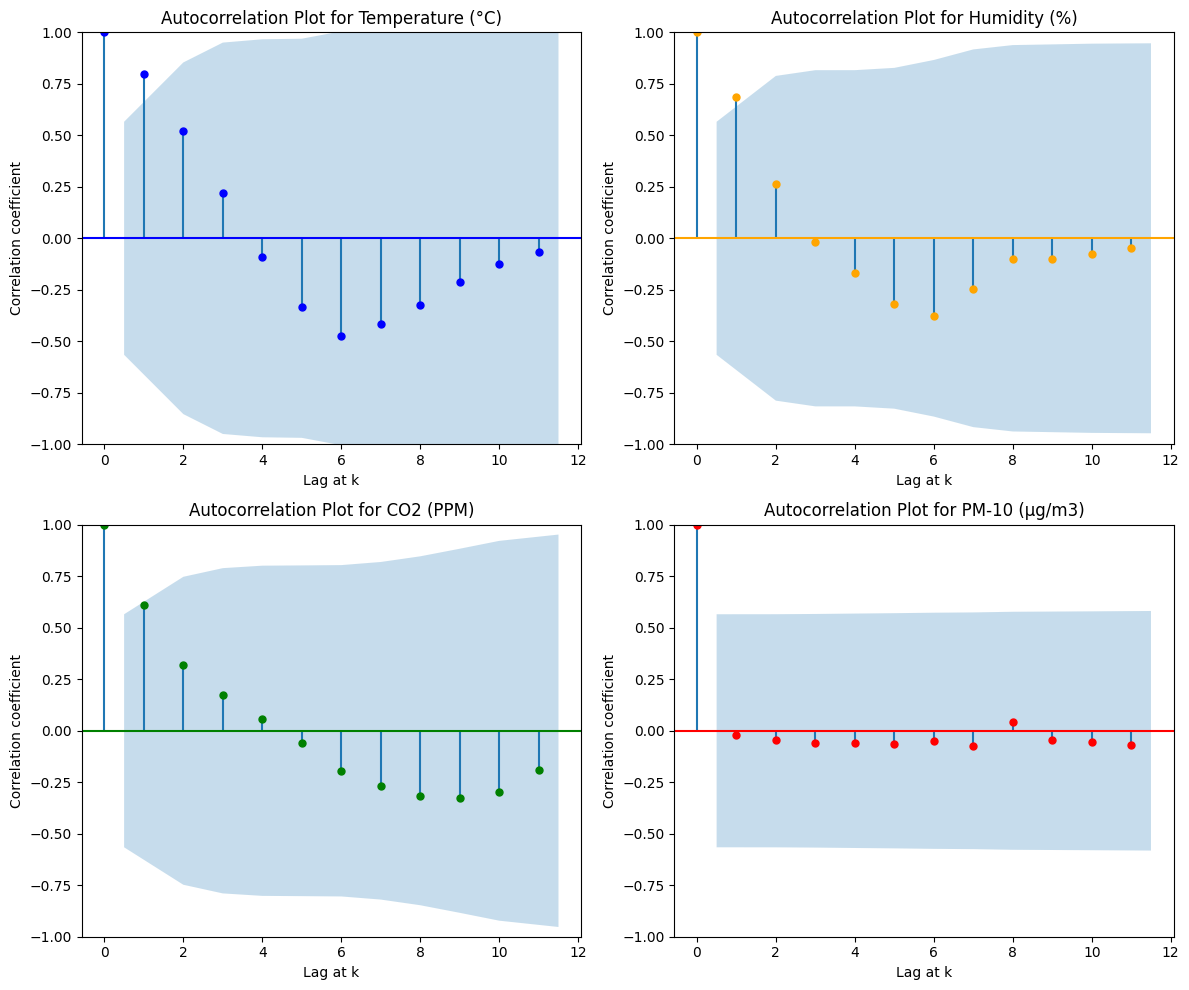

In [13]:
# Ensure that column names are correct and adjust if necessary
columns = ["Temperature (°C)", "Humidity (%)", "CO2 (PPM)", "PM-10 (μg/m3)"]

# Check if the DataFrame contains the specified columns
for col in columns:
    if col not in df_resampled.columns:
        raise ValueError(f"Column '{col}' not found in df_resampled DataFrame.")

# Plot autocorrelation for each column
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

colors = ['blue', 'orange', 'green', 'red']

for i, col in enumerate(columns):
    row = i // 2
    col = i % 2
    tsaplots.plot_acf(df_resampled[columns[i]], lags=11, ax=axs[row, col], color=colors[i])
    axs[row, col].set_title(f'Autocorrelation Plot for {columns[i]}')
    axs[row, col].set_xlabel("Lag at k")
    axs[row, col].set_ylabel("Correlation coefficient")

plt.tight_layout()
plt.show()


#### AQI 및 AQI_Bucket 컬럼 추가

In [14]:
# 'AQI' 컬럼 생성
df_resampled = df.resample('0.07min').mean()

df_resampled['AQI'] = 0

# for loop를 사용하여 각 행에 대한 AQI 값 계산 및 할당
for index, row in df_resampled.iterrows():
    PM_10_value = row['PM-10 (μg/m3)']
    AQI_value = ((100 - 51) / (80 - 31)) * (PM_10_value - 31) + 51
    df_resampled.at[index, 'AQI'] = AQI_value

df_resampled.head()

/tmp/ipykernel_35316/3661900489.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '35.76' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_resampled.at[index, 'AQI'] = AQI_value


,Temperature (°C),Humidity (%),CO2 (PPM),PM-10 (μg/m3),AQI
Date,,,,,
2024-03-10 13:01:37.200,26.2,23.0,293.500000,15.76,35.76
2024-03-10 13:01:41.400,26.2,23.0,289.000000,22.60,42.60
2024-03-10 13:01:45.600,26.2,23.0,285.000000,26.02,46.02
2024-03-10 13:01:49.800,26.2,23.0,283.500000,14.78,34.78
2024-03-10 13:01:54.000,26.2,23.0,281.333333,8.10,28.10


In [15]:
# 'AQI_Bucket' 컬럼 생성 및 값 할당
df_resampled['AQI_Bucket'] = pd.cut(df_resampled['AQI'], bins=[0, 50, 100, 250, 500], labels=['Good', 'Moderate', 'Unhealthy', 'Very Unhealthy'])

df_resampled

,Temperature (°C),Humidity (%),CO2 (PPM),PM-10 (μg/m3),AQI,AQI_Bucket
Date,,,,,,
2024-03-10 13:01:37.200,26.2,23.0,293.500000,15.760,35.760,Good
2024-03-10 13:01:41.400,26.2,23.0,289.000000,22.600,42.600,Good
2024-03-10 13:01:45.600,26.2,23.0,285.000000,26.020,46.020,Good
2024-03-10 13:01:49.800,26.2,23.0,283.500000,14.780,34.780,Good
2024-03-10 13:01:54.000,26.2,23.0,281.333333,8.100,28.100,Good
...,...,...,...,...,...,...
2024-03-10 13:59:22.200,22.6,18.0,124.500000,26.510,46.510,Good
2024-03-10 13:59:26.400,22.6,18.0,124.500000,26.995,46.995,Good
2024-03-10 13:59:30.600,22.6,18.0,124.500000,23.580,43.580,Good


In [16]:
df_resampled.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 830 entries, 2024-03-10 13:01:37.200000 to 2024-03-10 13:59:39
Freq: 4200ms
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Temperature (°C)  830 non-null    float64 
 1   Humidity (%)      830 non-null    float64 
 2   CO2 (PPM)         830 non-null    float64 
 3   PM-10 (μg/m3)     830 non-null    float64 
 4   AQI               830 non-null    float64 
 5   AQI_Bucket        817 non-null    category
dtypes: category(1), float64(5)
memory usage: 72.2 KB


#### Plotly 온라인 시각화

In [17]:
# 선 그래프 생성
trace_temp = go.Scatter(x=df_resampled.index, y=df_resampled['Temperature (°C)'], mode='lines', name='Temperature')
trace_humidity = go.Scatter(x=df_resampled.index, y=df_resampled['Humidity (%)'], mode='lines', name='Humidity')
trace_co2 = go.Scatter(x=df_resampled.index, y=df_resampled['CO2 (PPM)'], mode='lines', name='CO2')
trace_pm10 = go.Scatter(x=df_resampled.index, y=df_resampled['PM-10 (μg/m3)'], mode='lines', name='PM-10')
trace_aqi = go.Scatter(x=df_resampled.index, y=df_resampled['AQI'], mode='lines', name='AQI')

# 레이아웃 정의
layout = go.Layout(title='Time Series Plot', xaxis=dict(title='Date'), yaxis=dict(title='Value'))

# 그래프 객체 생성
fig = go.Figure(data=[trace_temp, trace_humidity, trace_co2, trace_pm10, trace_aqi], layout=layout)

# 그래프 표시
fig.show()


In [18]:
# Assuming df_resampled is the correct DataFrame to use
fig = go.Figure()

# Check if the column 'AQI' exists in df_resampled
if 'AQI' in df_resampled.columns:
    # 그래프 1
    for column in df_resampled.columns:
        if column != 'AQI_Bucket':  # Exclude AQI_Bucket column
            fig.add_trace(go.Scatter(x=df_resampled.index, y=df_resampled[column], mode='markers', name=column))

    # 그래프 2
    for column in df_resampled.columns:
        if column != 'AQI_Bucket':  # Exclude AQI_Bucket column
            fig.add_trace(go.Bar(x=df_resampled.index, y=df_resampled[column], name=column, visible=False))
else:
    print("Column 'AQI' not found in DataFrame.")

# 버튼 생성
buttons = []
for column in df_resampled.columns:
    if column != 'date' and column != 'AQI_Bucket':  # Exclude 'date' and 'AQI_Bucket' columns
        buttons.append(
            dict(label=column,
                 method="update",
                 args=[{"visible": [col == column for col in df_resampled.columns if col != 'date' and col != 'AQI_Bucket'] * 2},
                       {"title": column}])
        )

fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            buttons=buttons,
            direction="down",
            showactive=True,
            x=1.23,  # Adjusted x position
            xanchor="left",
            y=1.15,
            yanchor="top",
            bgcolor='lightblue', 
            bordercolor='blue',   
            font=dict(color='navy')  
        )
    ]
)

fig.show()


In [19]:
# 'Place' 컬럼 추가하고 1~5 랜덤값 할당
df_resampled['Place'] = np.random.randint(1, 6, size=len(df_resampled))

df_resampled

,Temperature (°C),Humidity (%),CO2 (PPM),PM-10 (μg/m3),AQI,AQI_Bucket,Place
Date,,,,,,,
2024-03-10 13:01:37.200,26.2,23.0,293.500000,15.760,35.760,Good,1
2024-03-10 13:01:41.400,26.2,23.0,289.000000,22.600,42.600,Good,2
2024-03-10 13:01:45.600,26.2,23.0,285.000000,26.020,46.020,Good,1
2024-03-10 13:01:49.800,26.2,23.0,283.500000,14.780,34.780,Good,3
2024-03-10 13:01:54.000,26.2,23.0,281.333333,8.100,28.100,Good,2
...,...,...,...,...,...,...,...
2024-03-10 13:59:22.200,22.6,18.0,124.500000,26.510,46.510,Good,5
2024-03-10 13:59:26.400,22.6,18.0,124.500000,26.995,46.995,Good,2
2024-03-10 13:59:30.600,22.6,18.0,124.500000,23.580,43.580,Good,3


In [20]:
# 서브플롯 생성
fig = make_subplots(rows=1, cols=5, subplot_titles=['Place 1', 'Place 2', 'Place 3', 'Place 4', 'Place 5'])

# 각 장소에 대한 AQI 분포 히스토그램 추가
# y축은 빈도수를 나타냄
for i, place in enumerate(range(1, 6), start=1):
    trace = go.Histogram(x=df_resampled[df_resampled['Place'] == place]['AQI'], name=f'Place {place}')
    fig.add_trace(trace, row=1, col=i)

# 레이아웃 설정
fig.update_layout(title_text="각 Place의 AQI 빈도수", showlegend=False)

# 그래프 출력
fig.show()


In [21]:
fig = make_subplots(rows=1, cols=1)

# 각 장소별로 AQI 지표를 상자 그림으로 추가
box_traces = []
for place in range(1, 6):
    box_trace = go.Box(y=df_resampled[df_resampled['Place'] == place]['AQI'], name=f'Place {place}', boxmean=True)
    box_traces.append(box_trace)

# 상자 그림을 서브플롯에 추가
for trace in box_traces:
    fig.add_trace(trace)

fig.update_layout(title_text="각 Place의 AQI 지표")
fig.show()


In [22]:
# 각 장소별 AQI 버킷의 빈도수 계산
freq_data = df_resampled.groupby(['Place', 'AQI_Bucket']).size().unstack(fill_value=0)

# 막대 그래프 생성
fig = go.Figure()

for place in range(1, 6):
    fig.add_trace(go.Bar(x=freq_data.columns, y=freq_data.loc[place], name=f'Place {place}'))

# 레이아웃 설정
fig.update_layout(barmode='stack', title="각 장소별 AQI 버킷의 빈도수", xaxis_title="AQI 버킷", yaxis_title="빈도수")

# 그래프 출력
fig.show()

/tmp/ipykernel_35316/2330201738.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [23]:
# 각 장소별 평균 AQI 계산
avg_aqi = df_resampled.groupby('Place')['AQI'].mean().reset_index()

# Pie chart 생성
fig = px.pie(avg_aqi, values='AQI', names='Place', title='Major Place Average AQI')

fig.show()

In [24]:
# 각 장소별 평균 AQI 계산
avg_aqi = df_resampled.groupby('Place')['AQI'].mean().reset_index()

# Bar plot 생성
fig = px.bar(avg_aqi, x='Place', y='AQI', text=avg_aqi['AQI'].round(2).apply(lambda x: f'<b>{x}</b>'), 
             title='Major Place Average AQI')

# 막대 위에 수치 표시
fig.update_traces(textposition='outside', textfont=dict(size=14))
fig.update_layout(width=800, height=600)

fig.show()


In [25]:
# 각 장소별 평균 AQI 계산
avg_aqi = df_resampled.groupby('Place')['AQI'].mean().reset_index()

# Line chart 생성
fig = px.line(avg_aqi, x='Place', y='AQI', title='각 Place를 별 AQI 지표', markers=True)
fig.show()

/tmp/ipykernel_35316/3878196103.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




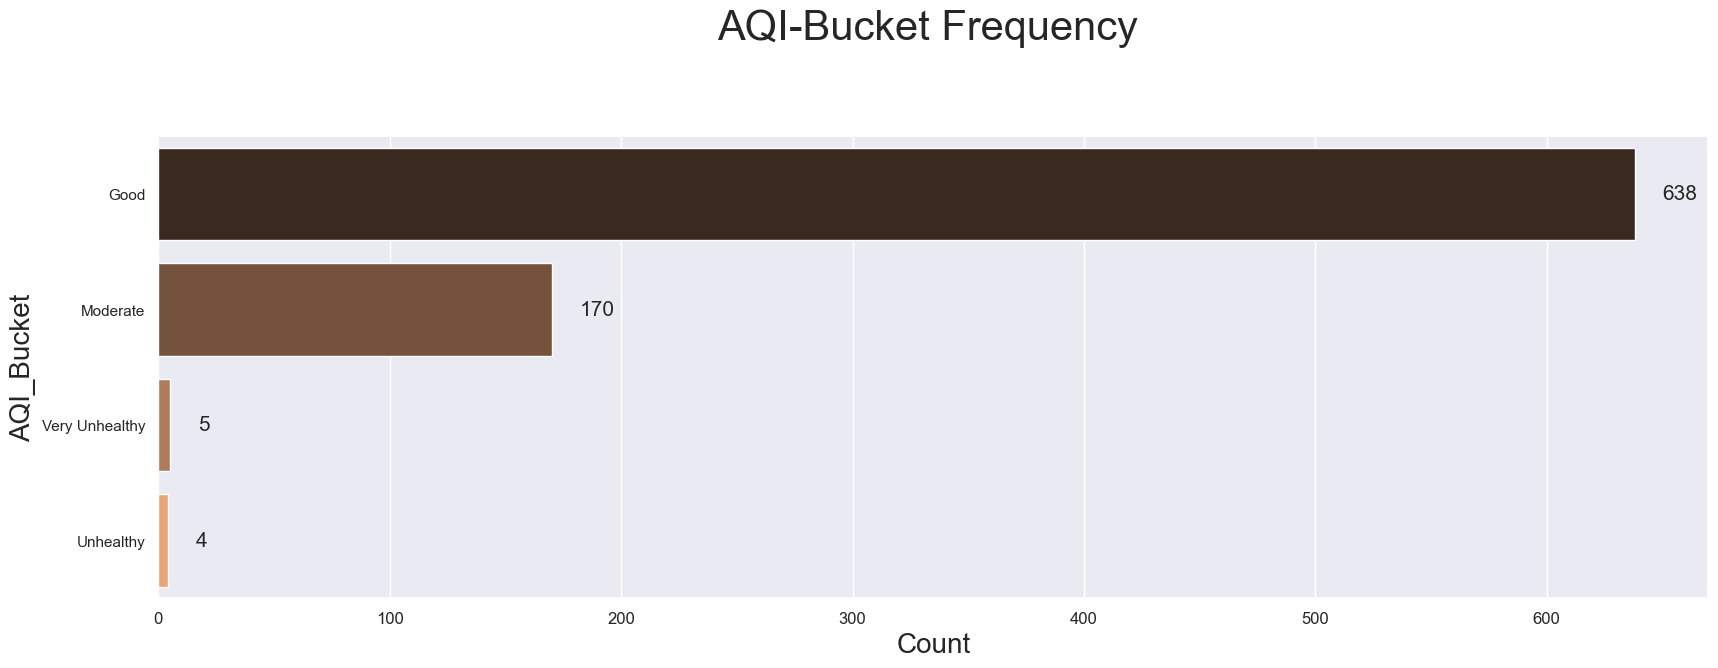

In [26]:
sns.set(rc={'figure.figsize':(20,6)})
plt.xticks(fontsize=12)
p = sns.countplot(y=df_resampled['AQI_Bucket'], order=df_resampled['AQI_Bucket'].value_counts().index, palette='copper')
p.set_xlabel('Count', fontsize=20)
p.set_ylabel('AQI_Bucket', fontsize=20)
for container in p.containers:
    p.bar_label(container, label_type='edge', padding=20, fontsize=15, rotation=0)
p.axes.set_title("AQI-Bucket Frequency \n\n", fontsize=30)
plt.show()


/tmp/ipykernel_35316/2043006266.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/home/kkyu/venv/deep_test/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

74.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/home/kkyu/venv/deep_test/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

50.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/home/kkyu/venv/deep_test/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

78.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/home/kkyu/venv/deep_test/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

55.3% of the points cannot be placed; you may want to decrease the

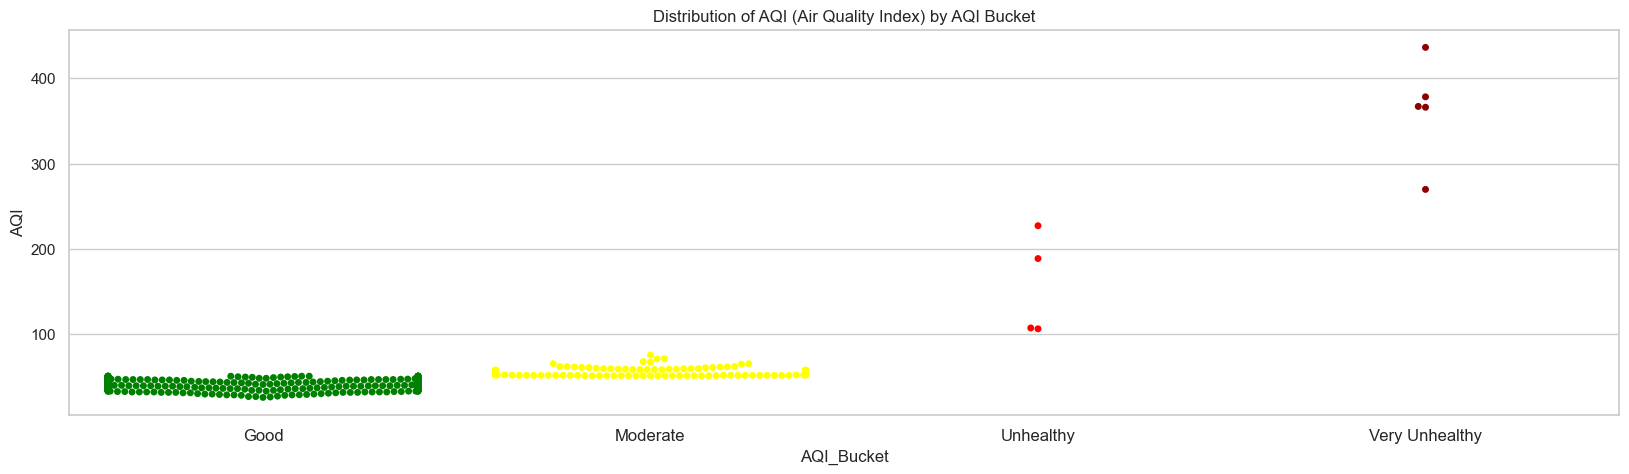

In [27]:
sns.set(rc={'figure.figsize':(20,5)})

# Set the style and palette
sns.set_style("whitegrid")
palette = {"Good": "green", 
           "Moderate": "yellow",
           "Unhealthy for Sensitive Groups": "orange",
           "Unhealthy": "red",
           "Very Unhealthy": "darkred"}

sns.swarmplot(data=df_resampled, x=df_resampled['AQI_Bucket'], y='AQI', order=['Good', 'Moderate', 'Unhealthy', 'Very Unhealthy'], palette=palette)

plt.title('Distribution of AQI (Air Quality Index) by AQI Bucket')
plt.xticks(fontsize=12)

plt.show()


/tmp/ipykernel_35316/54092734.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




Text(0.5, 1.0, 'AQI Values Distribution')

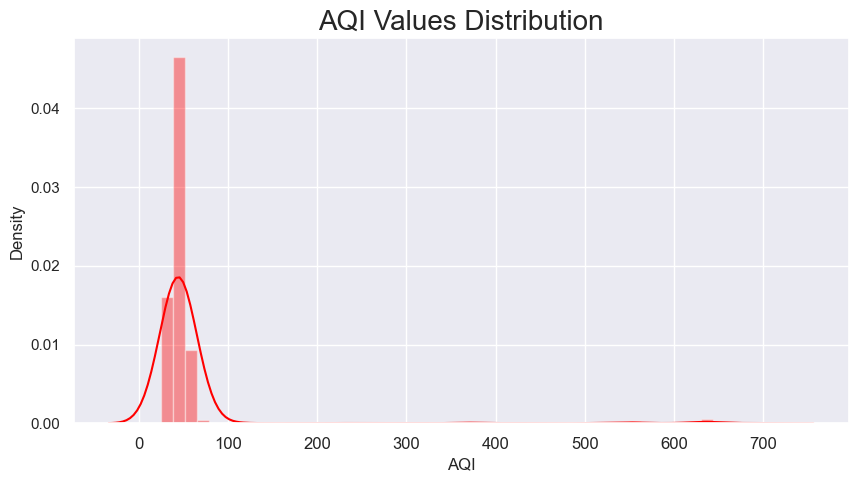

In [28]:
sns.set(rc={'figure.figsize':(10,5)})
plt.xticks(fontsize=12)
p=sns.distplot(df_resampled['AQI'],color='Red')
p.axes.set_title("AQI Values Distribution",fontsize=20)

/tmp/ipykernel_35316/1285507580.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




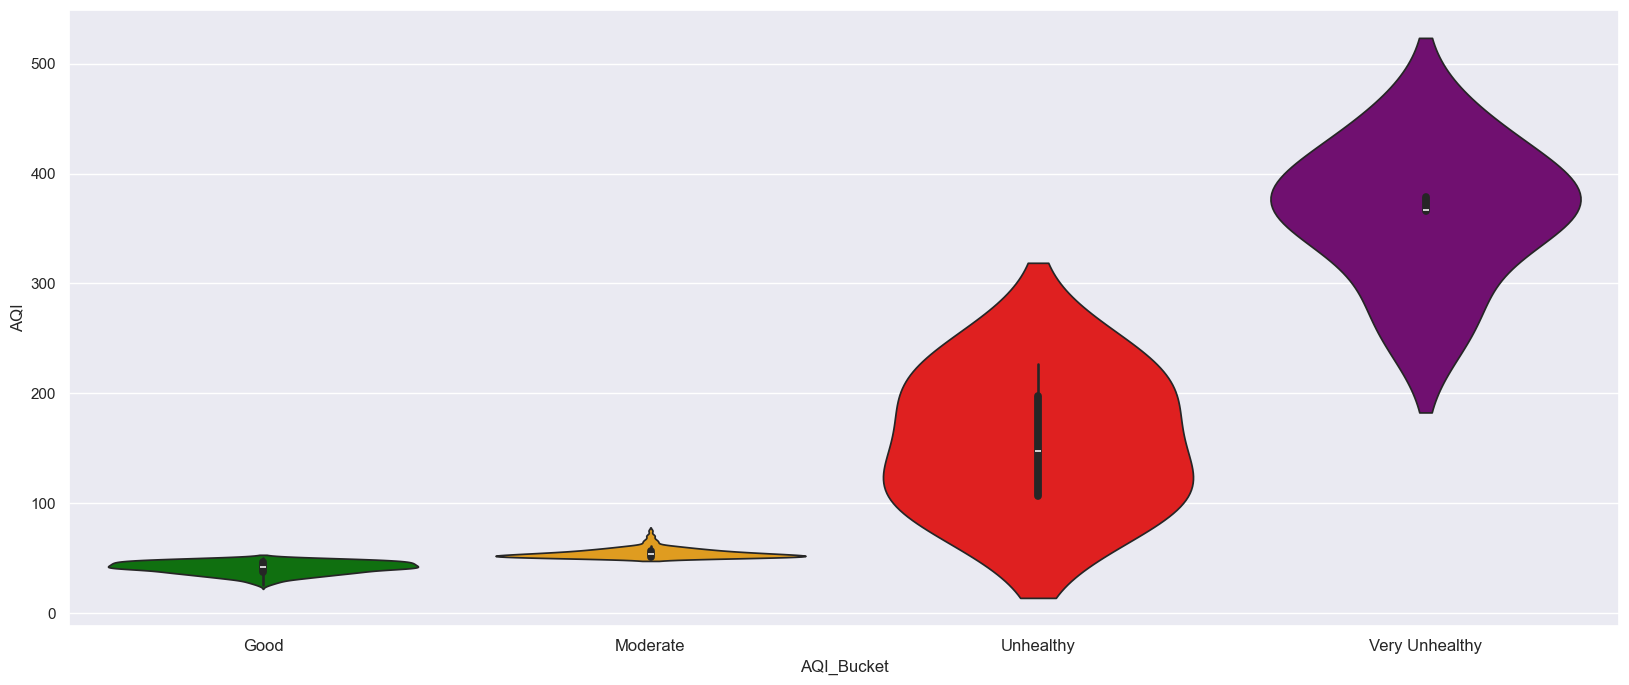

In [29]:
sns.set(rc={'figure.figsize':(20,8)})
plt.xticks(fontsize=12)

df_resampled['AQI'] = pd.to_numeric(df_resampled['AQI'])
custom_palette = {'Good': 'green', 'Moderate': 'orange', 'Unhealthy': 'red', 'Very Unhealthy': 'purple'}

sns.violinplot(data=df_resampled, x=df_resampled['AQI_Bucket'], y=df_resampled['AQI'], order=['Good', 'Moderate', 'Unhealthy', 'Very Unhealthy'], palette=custom_palette)
plt.show()